In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
chinese_reviews = pd.read_csv("../../../data/chinese_restaurants_reviews.csv")

In [9]:
chinese_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,norm_stars,RestaurantsDelivery,RestaurantsTakeOut,Mean,review_norm_stars,year,month,year_month
0,L0E_Ld__jIATsQ1vA7ZGZw,Cvi8nZTwDVaQkqmmgQwQMw,D4DZztR7vkbiED6txGUYFg,4.0,0,0,1,Looks like there is a second Red Kings restaur...,2013-06-24 13:15:21,1.02439,False,True,3.416667,1.170732,2013,6,2013-06-01
1,OxkAlukpCP6eVb5Q-nRC5w,DHMyfAYPrxmU5ve5BrteeA,D4DZztR7vkbiED6txGUYFg,1.0,1,0,0,I was here before once. Didn't have much of an...,2016-08-26 03:58:38,1.02439,False,True,3.416667,0.292683,2016,8,2016-08-01
2,YL7A5MHc1sUfulKQoZWH4w,qxgk0St0YctOKFSriqnzFw,D4DZztR7vkbiED6txGUYFg,3.0,0,0,0,Great foods! Everything is so spicy and delici...,2015-12-22 08:43:21,1.02439,False,True,3.416667,0.878049,2015,12,2015-12-01
3,bWucYqbH0TGMHH_moPrViA,MVMrSQyqClFac8nUdFKTDA,D4DZztR7vkbiED6txGUYFg,1.0,0,0,0,the service is soooooooooooooooooooooooo slow ...,2015-03-07 21:00:35,1.02439,False,True,3.416667,0.292683,2015,3,2015-03-01
4,WnRmMOOhRs2dCFC4sUz46g,TcJvptOC56hZZGwWM9QSZA,D4DZztR7vkbiED6txGUYFg,5.0,0,0,0,Absolutely fabulous. Great food great service...,2015-04-17 00:25:54,1.02439,False,True,3.416667,1.463415,2015,4,2015-04-01


<BarContainer object of 5 artists>

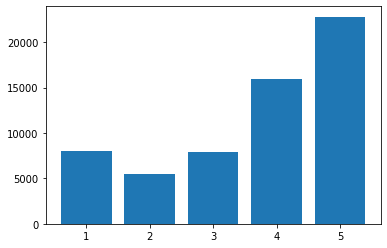

In [27]:
service_stars = chinese_reviews[chinese_reviews['text'].str.contains('service', case=False)]['stars'].value_counts()
plt.bar(service_stars.index.values, service_stars.values)

In [38]:
# Get the star rating distribution of the keyword
def get_keyword_dist(df, keyword):
    return df[df['text'].str.contains(keyword, case=False)]['stars'].value_counts()

In [39]:
keywords = ['service']
keyword_ratings = {}
for word in keywords:
    keyword_ratings[word] = get_keyword_dist(chinese_reviews, word)

In [40]:
keyword_ratings['service']

5.0    22816
4.0    15957
1.0     8056
3.0     7923
2.0     5435
Name: stars, dtype: int64

In [ ]:
def get_average_sentiment(df, keyword):
    